<a href="https://colab.research.google.com/github/geraldmogi/insitustressprediction/blob/main/Project_Well.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from pandas_profiling import ProfileReport

# **1. IMPORT WELL DATA**

In [2]:
url = 'https://raw.githubusercontent.com/geraldmogi/insitustressprediction/main/LostHillsX.csv'
df_X = pd.read_csv(url)

In [3]:
url_2 = 'https://raw.githubusercontent.com/geraldmogi/insitustressprediction/main/LostHillsY.csv'
df_y = pd.read_csv(url_2)

# **2. VIEW DATA TYPE**

As we can see the data type in df_X and df_Y are numeric data as we want. If the data is not in int or float then we have to convert it because in regression model we need to use numeric data type.

In [4]:
df_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DEPTH          167 non-null    int64  
 1   Pore_Pressure  167 non-null    int64  
 2   Density        167 non-null    float64
 3   dt_comp        167 non-null    int64  
 4   dt_shear       167 non-null    int64  
 5   Porosity       167 non-null    float64
 6   Vp             167 non-null    int64  
 7   Vs             167 non-null    int64  
 8   Edyn           167 non-null    int64  
 9   PR             167 non-null    float64
 10  Esta           167 non-null    int64  
 11  E'sta          167 non-null    int64  
dtypes: float64(3), int64(9)
memory usage: 15.8 KB


In [5]:
df_y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Sv          167 non-null    int64
 1   Sigma_v     167 non-null    int64
 2   Sigma_Hmax  167 non-null    int64
dtypes: int64(3)
memory usage: 4.0 KB


In [6]:
report = ProfileReport(df_X)

In [7]:
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#**3. Train Test Split**

Create train data and test data for our regression model. Train data will be used to train our regression model to study variables and correlations between variables to predict data. Test data is used to test our regression model.

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = df_X
y = df_y['Sigma_Hmax']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2022)

In [11]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 106 to 149
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DEPTH          51 non-null     int64  
 1   Pore_Pressure  51 non-null     int64  
 2   Density        51 non-null     float64
 3   dt_comp        51 non-null     int64  
 4   dt_shear       51 non-null     int64  
 5   Porosity       51 non-null     float64
 6   Vp             51 non-null     int64  
 7   Vs             51 non-null     int64  
 8   Edyn           51 non-null     int64  
 9   PR             51 non-null     float64
 10  Esta           51 non-null     int64  
 11  E'sta          51 non-null     int64  
dtypes: float64(3), int64(9)
memory usage: 5.2 KB


#**4. Modelling**

In [12]:
from sklearn.ensemble import RandomForestRegressor

In [13]:
default_model = RandomForestRegressor()

In [14]:
default_model.fit(X_train, y_train)

RandomForestRegressor()

In [15]:
default_model.score(X_train, y_train)

0.994087943729986

In [16]:
default_model.score(X_test, y_test)

0.9767823562839255

In [17]:
y_prediction = default_model.predict(X)

#**5. Evaluate Our Default Random Forest Regression Model**

Evaluate our regression model using the mean absolute error, Root Mean Square Error, and R2 metrics.

In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [21]:
#Evaluation
MAE = mean_absolute_error(y, y_prediction)
RMSE = np.sqrt(mean_squared_error(y, y_prediction))
R2 = r2_score(y, y_prediction)*100
print(f'MAE:', MAE)
print(f'RMSE:', RMSE)
print(f'R2:', R2)
print('\n')

MAE: 12.42449101796407
RMSE: 17.716108151169998
R2: 98.87864324116016




In [27]:
X['predictions'] = y_prediction
X['True Value'] = y

In [28]:
X.head(20)

DEPTH  Pore_Pressure  Density  dt_comp  dt_shear  Porosity    Vp   Vs  \
0    1750            700     1.87      177       477      0.37  1719  639   
1    1755            702     1.86      176       479      0.38  1728  636   
2    1760            704     1.85      180       481      0.39  1692  633   
3    1765            706     1.86      180       482      0.38  1698  632   
4    1770            708     1.87      177       473      0.37  1720  645   
5    1775            710     1.83      168       473      0.40  1815  644   
6    1780            712     1.86      170       481      0.38  1788  633   
7    1785            714     1.77      188       469      0.39  1619  650   
8    1790            716     1.88      161       456      0.37  1898  669   
9    1795            718     1.86      153       476      0.38  1997  641   
10   1800            720     1.77      176       495      0.39  1730  616   
11   1805            722     1.66      195       499      0.47  1564  611   
12   1810            724     1.62      188       458      0.50  1620  665   
13   1815            726     1.71      179       486      0.43  1704  627   
14   1820            728     1.60      241       516      0.51  1265  591   
15   1825            730     1.49      246       537      0.55  1240  568   
16   1830            732     1.42      231       529      0.61  1317  576   
17   1835            750     1.41      256       501      0.62  1189  609   
18   1840            768     1.45      246       479      0.58  1242  637   
19   1845            787     1.61      257       494      0.50  1187  617   

    Edyn    PR    Esta   E'sta  predictions  True Value  
0   2167  0.42  204211  247921       896.14         895  
1   2137  0.42  201428  245021       889.76         896  
2   2105  0.42  198433  240558       882.86         884  
3   2108  0.42  198704  241162       888.79         889  
4   2205  0.42  207835  251906       898.41         903  
5   2167  0.43  204276  250075       926.27         923  
6   2131  0.43  200887  246016       906.66         920  
7   2097  0.40  197644  236197       850.07         854  
8   2406  0.43  226747  277900       944.94         972  
9   2202  0.44  207553  258134       975.31         976  
10  1916  0.43  180603  220987       879.16         886  
11  1749  0.41  164829  198103       817.46         814  
12  2004  0.40  188831  224526       828.14         832  
13  1913  0.42  180331  219324       863.31         874  
14  1521  0.36  143347  164744       641.36         669  
15  1314  0.37  123843  143166       636.86         651  
16  1303  0.38  122768  143696       665.09         680  
17  1382  0.32  130230  145360       573.00         569  
18  1555  0.32  146528  163406       590.36         587  
19  1612  0.31  151917  168643       576.65         578

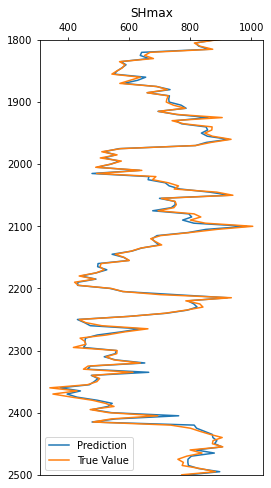

In [45]:
fig, axes = plt.subplots(figsize=(4,8))

axes.plot(X['predictions'], X['DEPTH'], label='Prediction')
axes.set_ylim(2500, 1800)
axes.plot(X['True Value'], X['DEPTH'], label='True Value')
axes.set_ylim(2500, 1800)
axes.set_title('SHmax')
axes.xaxis.set_ticks_position('top')
axes.legend()

# **6. Tuning Our Random Forest Regression Model

At this stage we use GridSearchCV to find the best hyperparameters for our random forest regression model so that our model can predict better.

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
rfr = RandomForestRegressor()

In [57]:
param_grid = {'n_estimators': [64, 100, 128, 200, 300, 500],
             'max_features': [2,3,4,6],
             'bootstrap': [True,False]}

In [58]:
grid = GridSearchCV(rfr, param_grid=param_grid)

In [59]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'max_features': [2, 3, 4, 6],
                         'n_estimators': [64, 100, 128, 200, 300, 500]})

This is the best hyperparameter for our Random Forest Regression Model to predict better.

In [60]:
grid.best_params_

{'bootstrap': False, 'max_features': 3, 'n_estimators': 128}

In [65]:
y_prediction_2 = grid.predict(X_test)

# **7. Evaluating Our Random Forest Regression After Tuning**

After doing GridSearchCV, it was found that the best hyperparameter for our model. Now we evaluate our model after we use the new hyperparameter and compare it with the default model before which to know which one is better to predict maximum horizontal stress (sigma_SHmax).

MAE: 13.8203125
RMSE: 19.6786630895368
R2: 98.62899780155051




Text(0.5, 0, 'True Value')

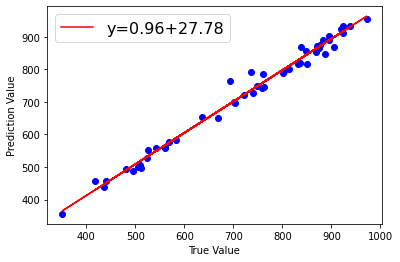

In [112]:
#Evaluation
MAE = mean_absolute_error(y_test, y_prediction_2)
RMSE = np.sqrt(mean_squared_error(y_test, y_prediction_2))
R2 = r2_score(y_test, y_prediction_2)*100
print(f'MAE:', MAE)
print(f'RMSE:', RMSE)
print(f'R2:', R2)
print('\n')

#Plot
plt.scatter(y_test, y_prediction_2, c='blue')
m, b = np.polyfit(y_test, y_prediction_2, 1)
plt.plot(y_test, m*y_test + b, label='y={:.2f}+{:.2f}'.format(m,b), c='red')
plt.legend(fontsize=16)
plt.ylabel('Prediction Value')
plt.xlabel('True Value')

# **8. Conlusion**

After tuning our model, we get a new hyperparameter that makes our model more accurate in predicting the SHmax value. Previously, our Random Forest Regression Model was able to predict the maximum horizontal stress value of 97.6% accurately, with an RMSE value of 25.62 psi. After tuning with GridSearchCV to get a new hyperparameter, our Random Forest Regression Model is able to predict the maximum horizontal stress value of 98.6% accurately, with an RMSE value of 19.67 psi.

MODEL EVALUATION AFTER TUNING
MAE: 19.29509803921569
RMSE: 25.620925156644
R2: 97.67599752621517


MODEL EVALUATION AFTER TUNING
MAE: 13.8203125
RMSE: 19.6786630895368
R2: 98.62899780155051




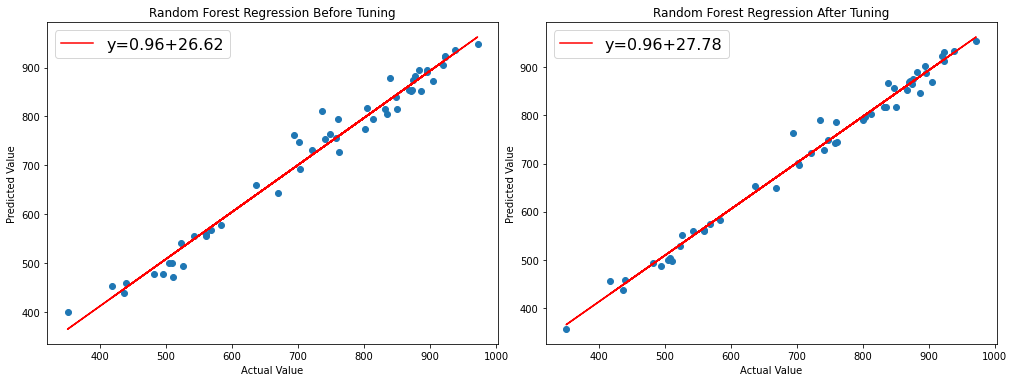

In [158]:
#Model Evaluation Before Tuning
MAE = mean_absolute_error(y_test, y_prediction)
RMSE = np.sqrt(mean_squared_error(y_test, y_prediction))
R2 = r2_score(y_test, y_prediction)*100
print('MODEL EVALUATION AFTER TUNING')
print(f'MAE:', MAE)
print(f'RMSE:', RMSE)
print(f'R2:', R2)
print('\n')

#Model Evaluation After Tuning
MAE = mean_absolute_error(y_test, y_prediction_2)
RMSE = np.sqrt(mean_squared_error(y_test, y_prediction_2))
R2 = r2_score(y_test, y_prediction_2)*100
print('MODEL EVALUATION AFTER TUNING')
print(f'MAE:', MAE)
print(f'RMSE:', RMSE)
print(f'R2:', R2)
print('\n')

#SUBPLOT
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
axes[0].scatter(y_test, y_prediction)
axes[1].scatter(y_test, y_prediction_2)
fig.tight_layout()

#PLOT 1
m, b = np.polyfit(y_test, y_prediction, 1)
axes[0].plot(y_test, m*y_test + b, label='y={:.2f}+{:.2f}'.format(m,b), c='red')
axes[0].legend(fontsize=16)
axes[0].title.set_text('Random Forest Regression Before Tuning')
axes[0].set_xlabel('Actual Value')
axes[0].set_ylabel('Predicted Value')

#PLOT 2
m, b = np.polyfit(y_test, y_prediction_2, 1)
axes[1].plot(y_test, m*y_test + b, label='y={:.2f}+{:.2f}'.format(m,b), c='red')
axes[1].legend(fontsize=16)
axes[1].title.set_text('Random Forest Regression After Tuning')
axes[1].set_xlabel('Actual Value')
axes[1].set_ylabel('Predicted Value')
plt.show()